In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  n_features=64,
                  centers=10,
                  center_box=(-1, +1))

print(X.shape, y.shape)

(1000, 64) (1000,)


In [3]:
X[0]

array([ 0.57654644, -0.25472936,  0.8518579 , -0.18607213, -2.30543765,
        1.62377325, -0.27892995, -0.48419456,  1.08578019, -0.91255236,
        0.63968976,  0.01457732, -1.5195516 ,  1.72135899, -0.9404441 ,
       -1.32362603,  1.91904752,  0.57097044,  0.41445168, -0.14879282,
        0.6629578 ,  0.11815615,  0.66164916,  0.68692735, -0.33775849,
       -0.55434697, -0.23005485, -1.79966779,  0.43543761,  0.35090283,
        1.98364141,  0.76654805, -1.02263639, -0.96199762,  1.84766098,
        1.06277651,  1.34884885, -2.05380602,  0.92145318,  0.78573115,
        0.82444317, -0.28426978, -0.50829758,  1.62354344, -1.1739816 ,
       -0.77721672, -0.65305982,  0.15088169,  1.79057077, -0.42128717,
       -0.27260148, -1.56304041,  2.56997854, -0.4593999 , -0.90651176,
       -1.11729907,  0.81516303,  0.93729096, -0.76876703, -1.02838648,
       -0.52606452,  1.58601366,  0.21116864, -0.19446733])

In [4]:
y[0:5]

array([8, 5, 7, 2, 5])

### Visualize

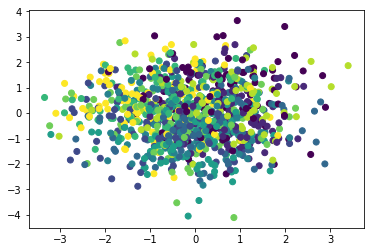

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel())

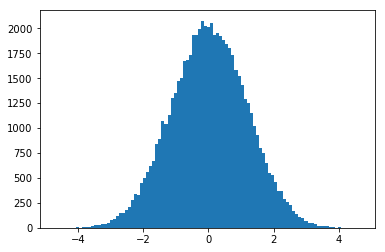

In [6]:
X.mean(), X.min(), X.max()

plt.hist(X.ravel(), bins=100)

tmp = 3

## Preprocessing

### One Hot Encode Label

In [7]:
y_hot = np.eye(10)[y]

print(y.shape, y_hot.shape)
y_hot[:10]

(1000,) (1000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Define Activate Functions

### Sigmoid

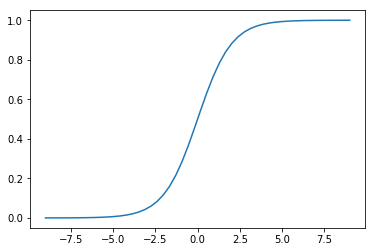

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(-9, +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

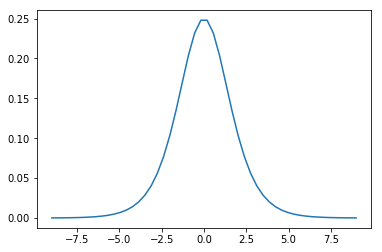

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(-9, +9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### tanh

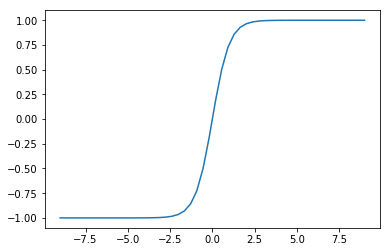

In [10]:
def tanh(x):
    return np.tanh(x)

xx = np.linspace(-9, +9)
yy = tanh(xx)

plt.plot(xx, yy)

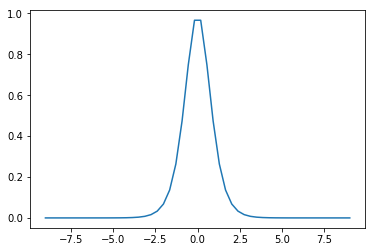

In [11]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

xx = np.linspace(-9, +9)
yy = tanh_derivative(xx)

plt.plot(xx, yy)

### ReLU

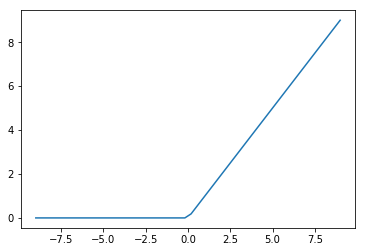

In [12]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

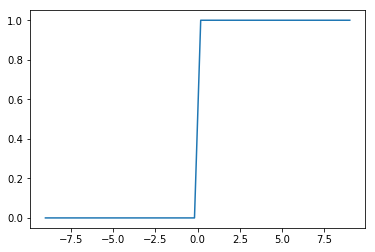

In [13]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

### Plot

In [14]:
def plot_w(ws, range_):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(ws[0].ravel(), bins=100, range=range_)
    axes[1].hist(ws[1].ravel(), bins=100, range=range_)
    axes[2].hist(ws[2].ravel(), bins=100, range=range_)
    axes[3].hist(ws[3].ravel(), bins=100, range=range_)
    axes[4].hist(ws[4].ravel(), bins=100, range=range_)

In [15]:
def plot_a(as_, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(as_[0].ravel(), bins=100, range=range_)
    axes[1].hist(as_[1].ravel(), bins=100, range=range_)
    axes[2].hist(as_[2].ravel(), bins=100, range=range_)
    axes[3].hist(as_[3].ravel(), bins=100, range=range_)
    axes[4].hist(as_[4].ravel(), bins=100, range=range_)

In [16]:
def plot_dzs(dzs, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(dzs[0].ravel(), bins=100, range=range_)
    axes[1].hist(dzs[1].ravel(), bins=100, range=range_)
    axes[2].hist(dzs[2].ravel(), bins=100, range=range_)
    axes[3].hist(dzs[3].ravel(), bins=100, range=range_)

In [17]:
def plot_ds(ds, range_=None, exclude=0.0):
    figure, axes = plt.subplots(nrows=1, ncols=5)
    figure.set_size_inches(24, 4)

    axes[0].hist(ds[4][(ds[4] > exclude) | (ds[4] < -exclude)], bins=100, range=range_)
    axes[1].hist(ds[3][(ds[3] > exclude) | (ds[3] < -exclude)], bins=100, range=range_)
    axes[2].hist(ds[2][(ds[2] > exclude) | (ds[2] < -exclude)], bins=100, range=range_)
    axes[3].hist(ds[1][(ds[1] > exclude) | (ds[1] < -exclude)], bins=100, range=range_)
    axes[4].hist(ds[0][(ds[0] > exclude) | (ds[0] < -exclude)], bins=100, range=range_)

### Build a Model

In [18]:
def train(X, y, num_epoch, learning_rate, ws, bs, activation, activation_derivative):
    w1, w2, w3, w4, w5 = ws[0], ws[1], ws[2], ws[3], ws[4]
    b1, b2, b3, b4, b5 = bs[0], bs[1], bs[2], bs[3], bs[4]

    history = []
    
    for epoch in range(num_epoch):
        z1 = X.dot(w1) + b1
        a1 = activation(z1)
        z2 = a1.dot(w2) + b2
        a2 = activation(z2)
        z3 = a2.dot(w3) + b3
        a3 = activation(z3)
        z4 = a3.dot(w4) + b4
        a4 = activation(z4)
        z5 = a4.dot(w5) + b5
        a5 = sigmoid(z5)

        y_predict = np.argmax(a5, axis=1)
        error = (y_predict != y).mean()

        history.append({
            'epoch': epoch,
            'error': error
        })

        if epoch % (num_epoch / 10) == 0:
            print("{0:3} error = {1:.5f}".format(epoch, error))

        if error < 0.01:
            break

        d5 = (a5 - y_hot)

        d4 = d5.dot(w5.T) * activation_derivative(a4)
        d3 = d4.dot(w4.T) * activation_derivative(a3)
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w5 = w5 - learning_rate * a4.T.dot(d5)
        w4 = w4 - learning_rate * a3.T.dot(d4)
        w3 = w3 - learning_rate * a2.T.dot(d3) 
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

        b5 = b5 - d5.mean(axis=0)
        b4 = b4 - d4.mean(axis=0)
        b3 = b3 - d3.mean(axis=0)
        b2 = b2 - d2.mean(axis=0)
        b1 = b1 - d1.mean(axis=0)

    print("----" * 10)
    print("{0:3} error = {1:.5f}".format(epoch, error))

    dz2 = activation_derivative(z1).dot(w2) # dz2 / dz1
    dz3 = activation_derivative(z2).dot(w3) # dz3 / dz2
    dz4 = activation_derivative(z3).dot(w4) # dz4 / dz3
    dz5 = activation_derivative(z4).dot(w5) # dz5 / dz4
    
    as_ = [a1, a2, a3, a4, a5]
    bs = [b1,b2,b3,b4,b5]
    dzs = [dz2, dz3, dz4, dz5]
    ds = [d5, d4, d3, d2, d1]

    return error, ws, bs, as_, dzs, ds, history

### Case 1 - Small Random Number + Sigmoid

In [19]:

w1 = np.random.randn(64,100) * 0.05
w2 = np.random.randn(100,100) * 0.05
w3 = np.random.randn(100,100) * 0.05
w4 = np.random.randn(100,100) * 0.05
w5 = np.random.randn(100,10) * 0.05

b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1,w2,w3,w4,w5]
bs = [b1,b2,b3,b4,b5]

num_epoch = 1000
learning_rate= 0.0003

error, ws, bs, as_, dzs, ds, _ = train(X,y,num_epoch, learning_rate,
                                      ws,bs,
                                      activation = sigmoid,
                                      activation_derivative = sigmoid_derivative)

  0 error = 0.90000
100 error = 0.89500
200 error = 0.87300
300 error = 0.83300
400 error = 0.81100
500 error = 0.78100
600 error = 0.74900
700 error = 0.71100
800 error = 0.68300
900 error = 0.64300
----------------------------------------
999 error = 0.61300


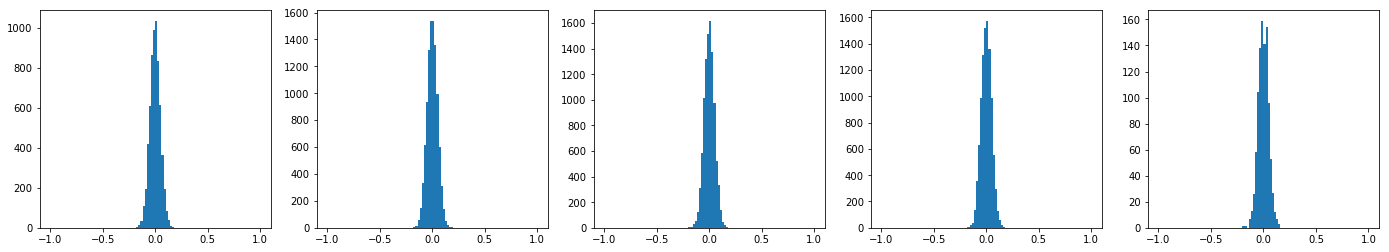

In [20]:
plot_w(ws, range_=(-1.0, +1.0))

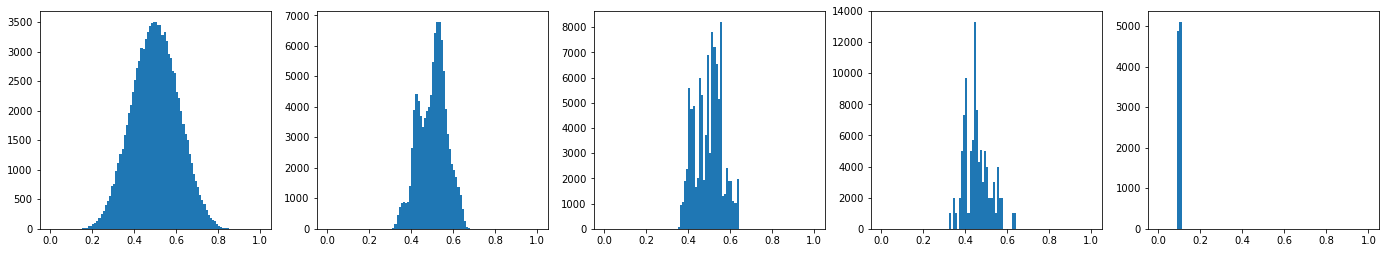

In [21]:
plot_w(as_, range_=(0.0, +1.0))

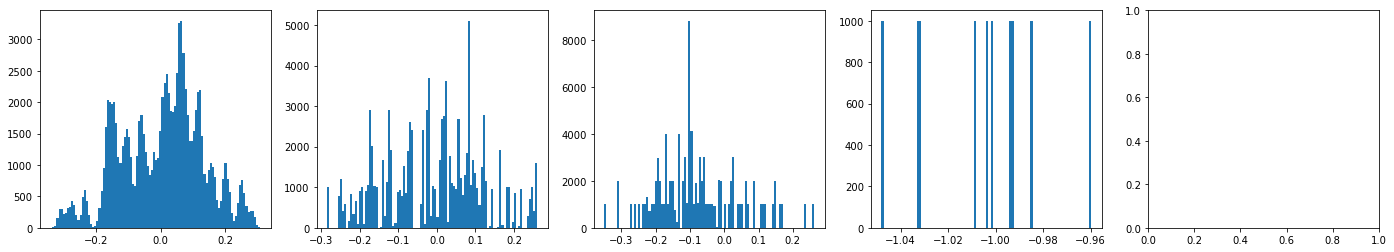

In [22]:
plot_dzs(dzs)

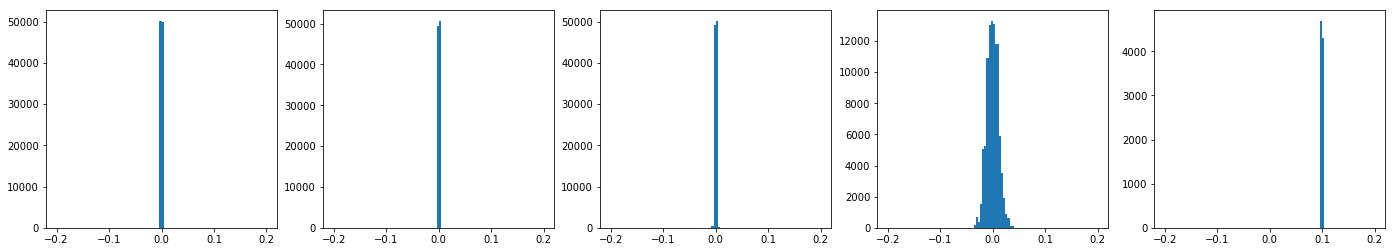

In [23]:
plot_ds(ds, range_=(-0.2,+0.2))

### Case 2 - Small Random Number + tanh

In [24]:
w1 = np.random.randn(64,100) * 0.05
w2 = np.random.randn(100,100) * 0.05
w3 = np.random.randn(100,100) * 0.05
w4 = np.random.randn(100,100) * 0.05
w5 = np.random.randn(100,10) * 0.05

b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1,w2,w3,w4,w5]
bs = [b1,b2,b3,b4,b5]

num_epoch = 100
learning_rate= 0.0003

error, ws, bs, as_, dzs, ds, _ = train(X,y,num_epoch, learning_rate,
                                      ws,bs,
                                      activation = tanh,
                                      activation_derivative = tanh_derivative)

  0 error = 0.92800
 10 error = 0.40200
 20 error = 0.30800
 30 error = 0.26000
 40 error = 0.11100
 50 error = 0.03600
 60 error = 0.01900
 70 error = 0.01000
----------------------------------------
 72 error = 0.00900


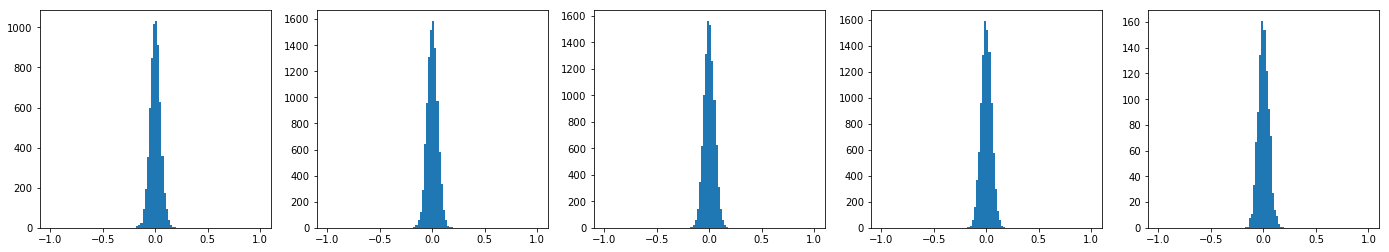

In [25]:
plot_w(ws, range_=(-1.0, +1.0))

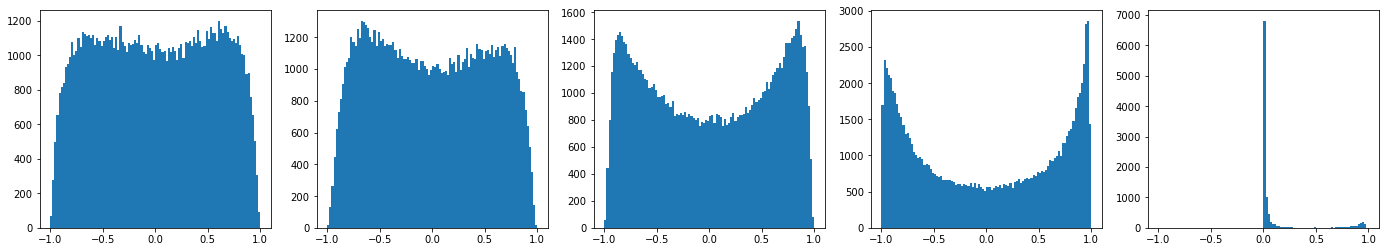

In [26]:
plot_w(as_, range_=(-1.0, +1.0))

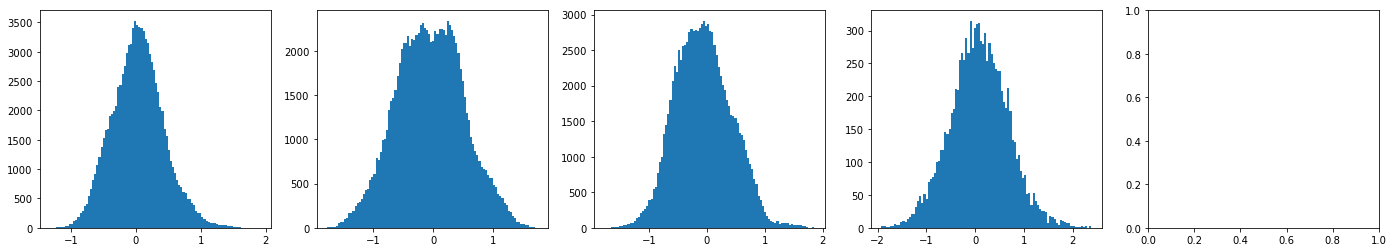

In [27]:
plot_dzs(dzs)

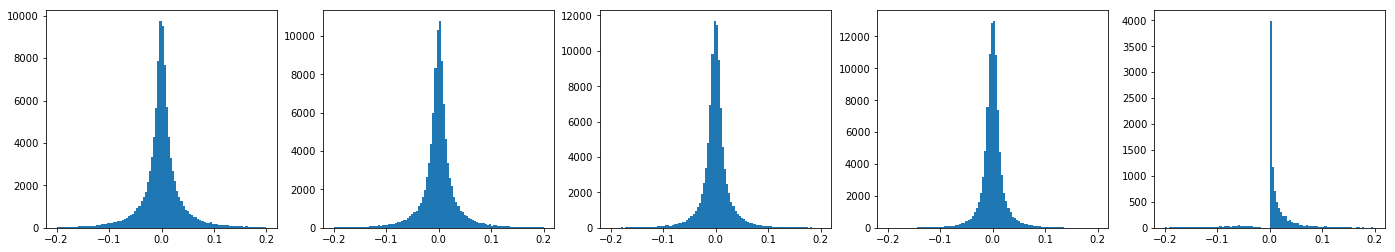

In [28]:
plot_ds(ds, range_=(-0.2,+0.2))

### Case 3 - Xavior Initialization + tanh

In [29]:
w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64,100))
w2 = np.random.uniform(low=-np.sqrt(6 / (100+100)),
                       high=+np.sqrt(6 / (100+100)),
                       size=(100,100))
w3 = np.random.uniform(low=-np.sqrt(6 / (100+100)),
                       high=+np.sqrt(6 / (100+100)),
                       size=(100,100))
w4 = np.random.uniform(low=-np.sqrt(6 / (100+100)),
                       high=+np.sqrt(6 / (100+100)),
                       size=(100,100))
w5 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100,10))

b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1,w2,w3,w4,w5]
bs = [b1,b2,b3,b4,b5]

num_epoch = 100
learning_rate= 0.0003

error, ws, bs, as_, dzs, ds, _ = train(X,y,num_epoch, learning_rate,
                                      ws,bs,
                                      activation = tanh,
                                      activation_derivative = tanh_derivative)

  0 error = 0.87100
 10 error = 0.01900
----------------------------------------
 17 error = 0.00900


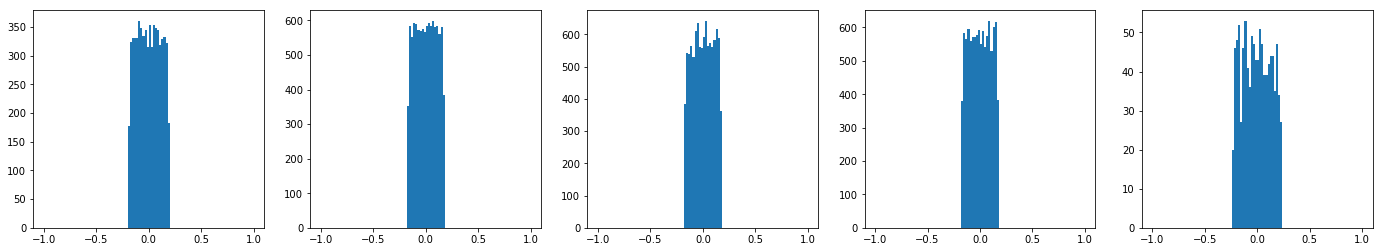

In [30]:
plot_w(ws, range_=(-1.0, +1.0))

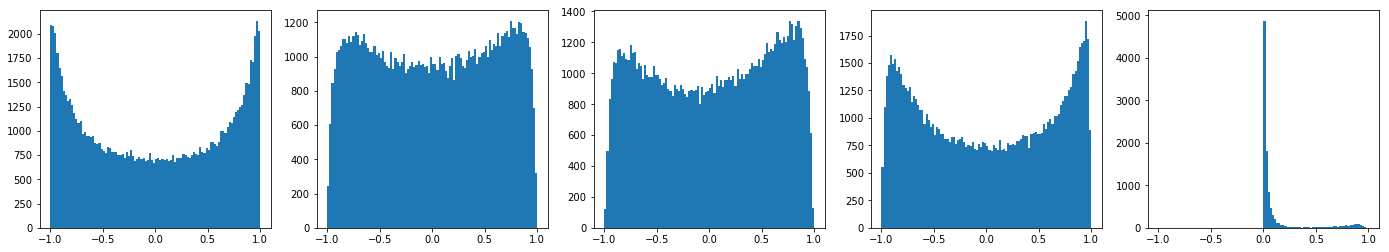

In [31]:
plot_w(as_, range_=(-1.0, +1.0))

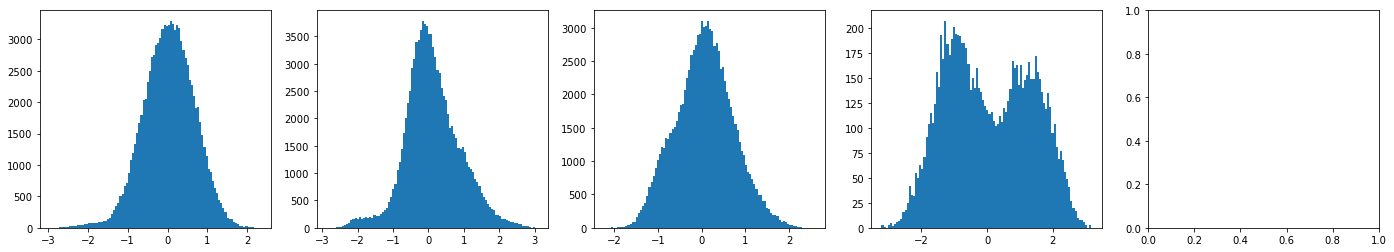

In [32]:
plot_dzs(dzs)

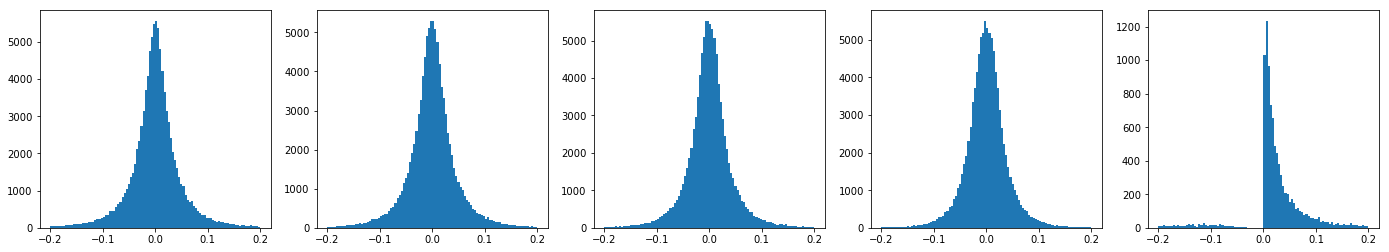

In [33]:
plot_ds(ds, range_=(-0.2,+0.2))

### Case 4 - Xavior Initialization + ReLU

In [34]:
w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64,100))
w2 = np.random.uniform(low=-np.sqrt(6 / (100+100)),
                       high=+np.sqrt(6 / (100+100)),
                       size=(100,100))
w3 = np.random.uniform(low=-np.sqrt(6 / (100+100)),
                       high=+np.sqrt(6 / (100+100)),
                       size=(100,100))
w4 = np.random.uniform(low=-np.sqrt(6 / (100+100)),
                       high=+np.sqrt(6 / (100+100)),
                       size=(100,100))
w5 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100,10))

b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1,w2,w3,w4,w5]
bs = [b1,b2,b3,b4,b5]

num_epoch = 100
learning_rate= 0.0003

error, ws, bs, as_, dzs, ds, _ = train(X,y,num_epoch, learning_rate,
                                      ws,bs,
                                      activation = relu,
                                      activation_derivative = relu_derivative)

  0 error = 0.87800
 10 error = 0.43100
 20 error = 0.18800
----------------------------------------
 28 error = 0.00400


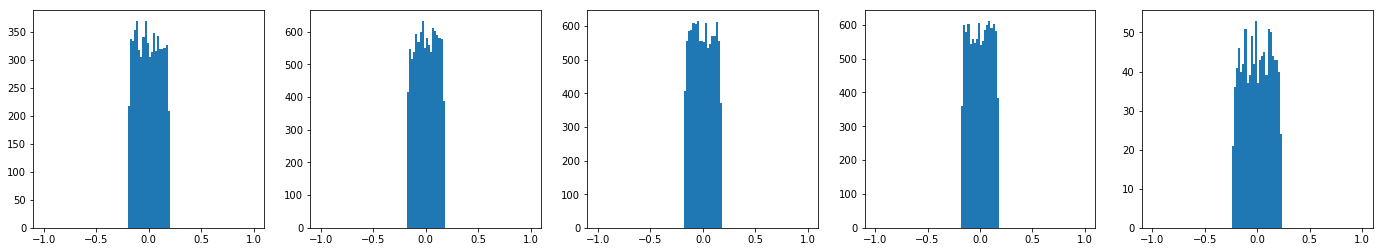

In [35]:
plot_w(ws, range_=(-1.0, +1.0))

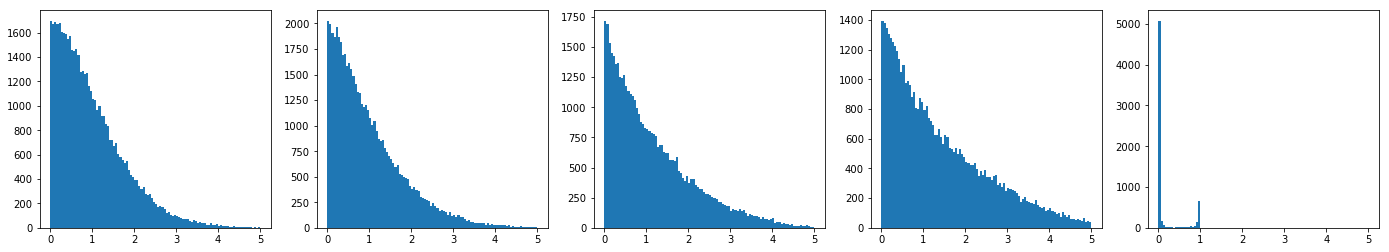

In [36]:
plot_a(as_, range_=(0.001, 5.0))

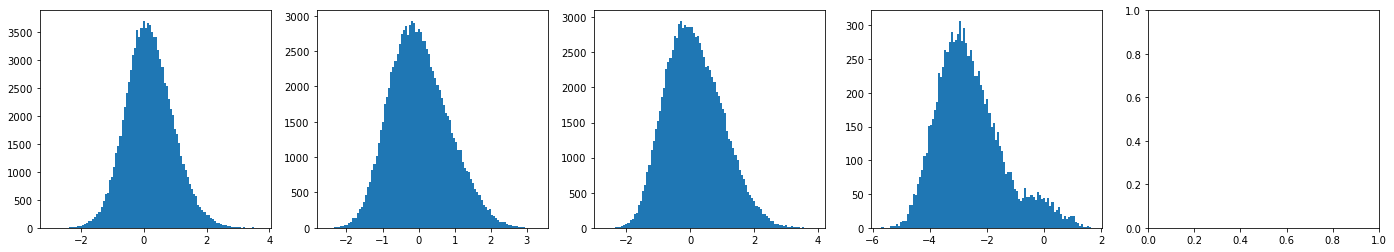

In [37]:
plot_dzs(dzs)

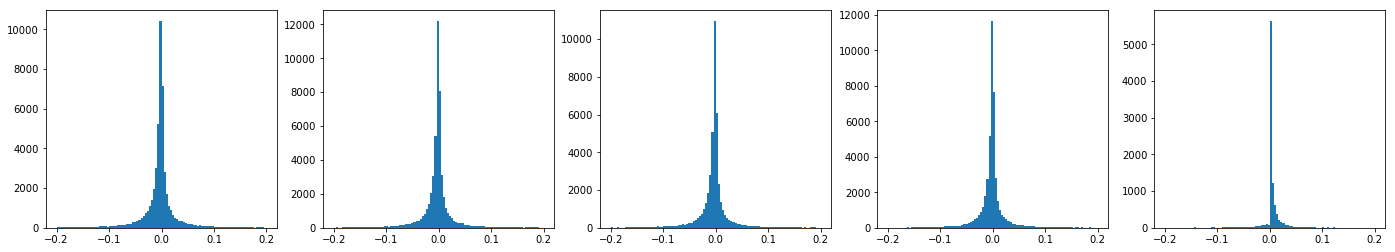

In [38]:
plot_ds(ds, range_=(-0.2,+0.2))

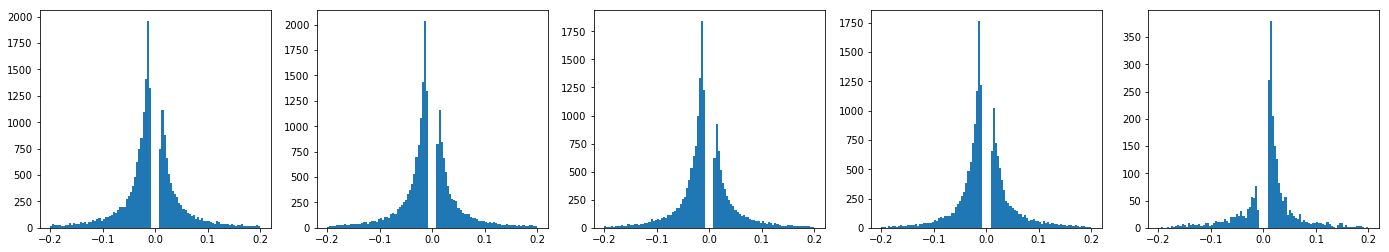

In [39]:
plot_ds(ds, exclude = 0.01, range_=(-0.2,+0.2))

### Case 4 - He Initialization + ReLU

In [40]:
w1 = np.random.uniform(low=-np.sqrt(6/64),
                       high=+np.sqrt(6/64),
                       size=(64,100))
w2 = np.random.uniform(low=-np.sqrt(6/100),
                       high=+np.sqrt(6/100),
                       size=(100,100))
w3 = np.random.uniform(low=-np.sqrt(6/100),
                       high=+np.sqrt(6/100),
                       size=(100,100))
w4 = np.random.uniform(low=-np.sqrt(6/100),
                       high=+np.sqrt(6/100),
                       size=(100,100))
w5 = np.random.uniform(low=-np.sqrt(6/100),
                       high=+np.sqrt(6/100),
                       size=(100,10))

b1 = np.zeros((1,100))
b2 = np.zeros((1,100))
b3 = np.zeros((1,100))
b4 = np.zeros((1,100))
b5 = np.zeros((1,10))

ws = [w1,w2,w3,w4,w5]
bs = [b1,b2,b3,b4,b5]

num_epoch = 100
learning_rate= 0.0003

error, ws, bs, as_, dzs, ds, _ = train(X,y,num_epoch, learning_rate,
                                      ws,bs,
                                      activation = relu,
                                      activation_derivative = relu_derivative)

  0 error = 0.89100
 10 error = 0.60000
 20 error = 0.67500
 30 error = 0.14900
 40 error = 0.02600
----------------------------------------
 49 error = 0.00600


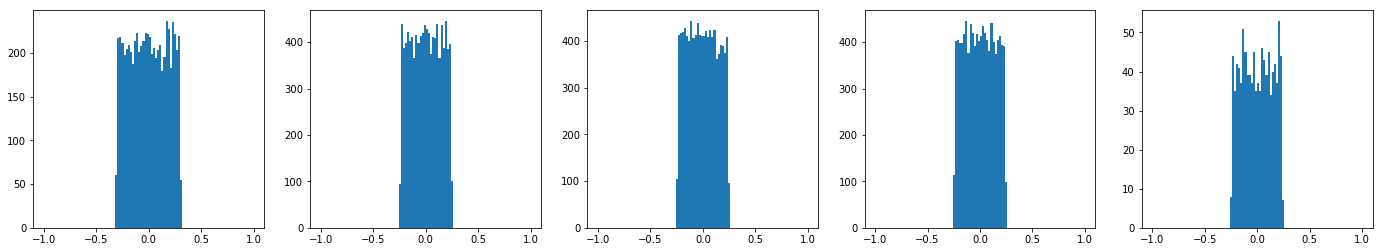

In [41]:
plot_w(ws, range_=(-1.0, +1.0))

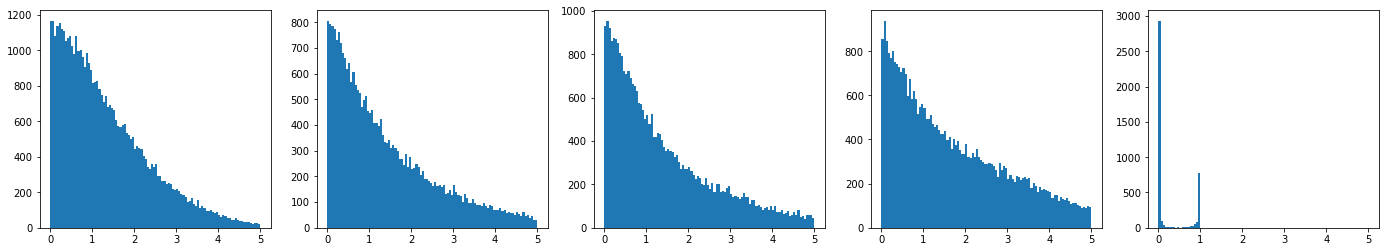

In [42]:
plot_a(as_, range_=(0.001, 5.0))

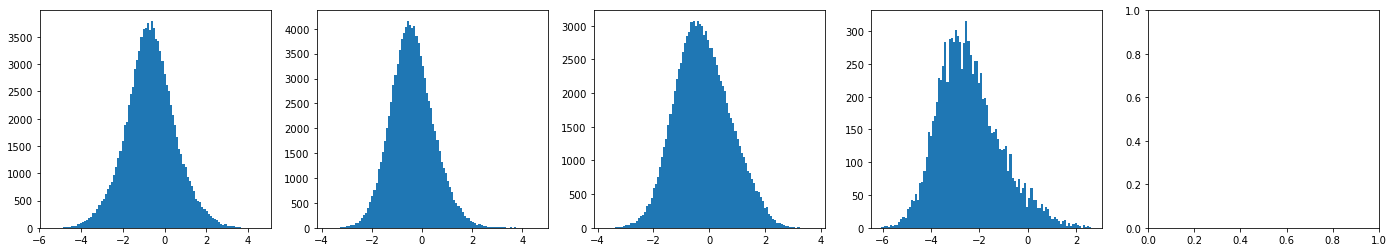

In [43]:
plot_dzs(dzs)

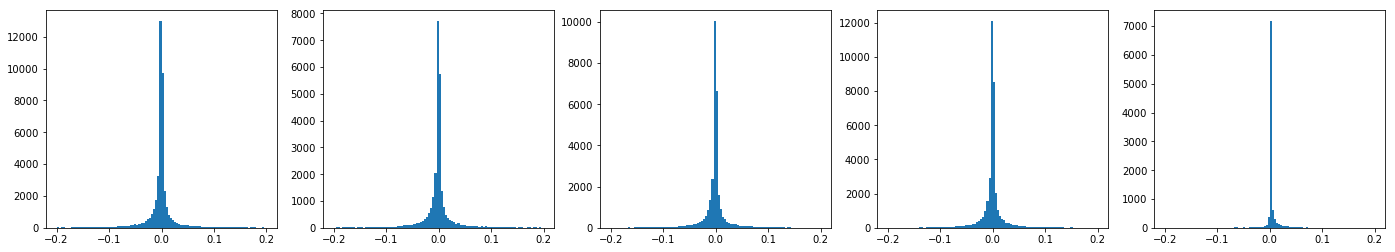

In [44]:
plot_ds(ds, range_=(-0.2,+0.2))

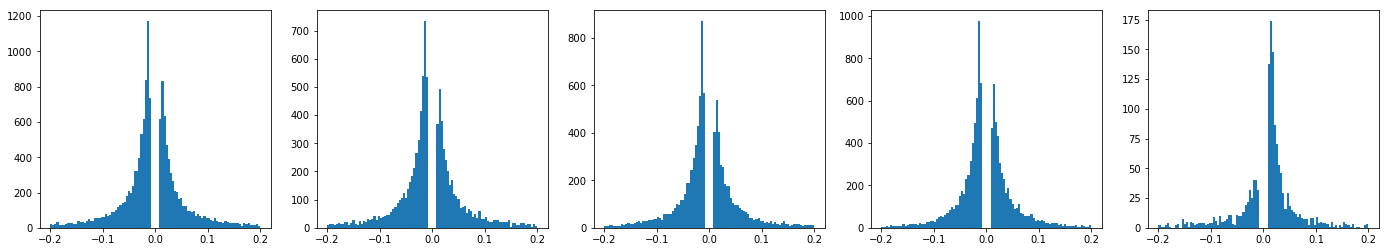

In [45]:
plot_ds(ds, exclude = 0.01, range_=(-0.2,+0.2))